# Predicción de demora de cuentas por cobrar

## Exploración del df

In [6]:
import pandas as pd

df = pd.read_excel("/content/Daset_Comprobantes.xlsx")
# Counts rows
print("Tamaño del df:",df.shape)

Tamaño del df: (43270, 17)


In [7]:
df.head()

,ID_Cliente,ID_Provee,Asiento,ID_Centro_Costo,Fecha_Emision,Fecha_Vencimiento,Desc_CondicionPago,ImporteTotal,ImporteNet,NComp,DescTipo,OrigenComp,Pagado,FaltaPagar,NroFactura,Pagada?,Demora
0,555.0,NaN,Ventas46849,40,2020-02-13,2020-02-18,Transferencia,"89734,76","74160,96",400005978,FC Electr. A,Ventas,"89734,76",0,400005978,Si,15.0
1,555.0,NaN,Ventas47124,40,2020-03-02,2020-03-07,Transferencia,"148994,56",123136,400006078,FC Electr. A,Ventas,"148994,56",0,400006078,Si,24.0
2,555.0,NaN,Ventas47126,40,2020-03-02,2020-03-07,Transferencia,"37484,83","30979,2",400006080,FC Electr. A,Ventas,"37484,83",0,400006080,Si,24.0
3,555.0,NaN,Ventas47128,40,2020-03-02,2020-03-07,Transferencia,"10071,85","8323,84",400006082,FC Electr. A,Ventas,"10071,85",0,400006082,Si,24.0
4,555.0,NaN,Ventas47726,40,2020-04-01,2020-04-06,Transferencia,"153068,63",126503,400006234,FC Electr. A,Ventas,"153068,63",0,400006234,Si,12.0


In [8]:
df.columns

Index(['ID_Cliente', 'ID_Provee', 'Asiento', 'ID_Centro_Costo',
       'Fecha_Emision', 'Fecha_Vencimiento', 'Desc_CondicionPago',
       'ImporteTotal', 'ImporteNet', 'NComp', 'DescTipo', 'OrigenComp',
       'Pagado', 'FaltaPagar', 'NroFactura', 'Pagada?', 'Demora'],
      dtype='object')

In [9]:
# Count NaN values
df.isna().sum()

ID_Cliente            17111
ID_Provee             26161
Asiento                   0
ID_Centro_Costo           0
Fecha_Emision             0
Fecha_Vencimiento         0
Desc_CondicionPago    17757
ImporteTotal              0
ImporteNet                0
NComp                     0
DescTipo                  0
OrigenComp                0
Pagado                19141
FaltaPagar                0
NroFactura                0
Pagada?                   0
Demora                10046
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43270 entries, 0 to 43269
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Cliente          26159 non-null  float64       
 1   ID_Provee           17109 non-null  float64       
 2   Asiento             43270 non-null  object        
 3   ID_Centro_Costo     43270 non-null  int64         
 4   Fecha_Emision       43270 non-null  datetime64[ns]
 5   Fecha_Vencimiento   43270 non-null  datetime64[ns]
 6   Desc_CondicionPago  25513 non-null  object        
 7   ImporteTotal        43270 non-null  object        
 8   ImporteNet          43270 non-null  object        
 9   NComp               43270 non-null  int64         
 10  DescTipo            43270 non-null  object        
 11  OrigenComp          43270 non-null  object        
 12  Pagado              24129 non-null  object        
 13  FaltaPagar          43270 non-null  object    

Hay una cantidad significativa de valores nulos en varias columnas:

ID_Cliente: 17,111 valores nulos.
ID_Provee: 26,161 valores nulos.
Desc_CondicionPago: 17,757 valores nulos.
Pagado: 19,141 valores nulos.
Demora: 10,046 valores nulos.
Tipos de Datos:

Las columnas Fecha_Emision y Fecha_Vencimiento son del tipo datetime64, lo cual es adecuado para manejar fechas.
Las columnas ImporteTotal, ImporteNet, Pagado, y FaltaPagar están como objetos (probablemente strings). Para análisis numéricos, deberían convertirse a tipo numérico, teniendo cuidado con el formato de los números (por ejemplo, el uso de comas como separadores de miles).

In [11]:
import numpy as np

# Función para convertir cadenas de texto en formato español a números (ej. "1.234,56" a 1234.56)
def convert_to_float(spanish_number_str):
    if pd.isna(spanish_number_str):
        return np.nan
    return float(str(spanish_number_str).replace('.', '').replace(',', '.'))

# Convertir columnas de importes a tipo numérico
df['ImporteTotal'] = df['ImporteTotal'].apply(convert_to_float)
df['ImporteNet'] = df['ImporteNet'].apply(convert_to_float)
df['Pagado'] = df['Pagado'].apply(convert_to_float)
df['FaltaPagar'] = df['FaltaPagar'].apply(convert_to_float)

# Revisar el df después de las conversiones
df.head()


,ID_Cliente,ID_Provee,Asiento,ID_Centro_Costo,Fecha_Emision,Fecha_Vencimiento,Desc_CondicionPago,ImporteTotal,ImporteNet,NComp,DescTipo,OrigenComp,Pagado,FaltaPagar,NroFactura,Pagada?,Demora
0,555.0,NaN,Ventas46849,40,2020-02-13,2020-02-18,Transferencia,89734.76,74160.96,400005978,FC Electr. A,Ventas,89734.76,0.0,400005978,Si,15.0
1,555.0,NaN,Ventas47124,40,2020-03-02,2020-03-07,Transferencia,148994.56,123136.00,400006078,FC Electr. A,Ventas,148994.56,0.0,400006078,Si,24.0
2,555.0,NaN,Ventas47126,40,2020-03-02,2020-03-07,Transferencia,37484.83,30979.20,400006080,FC Electr. A,Ventas,37484.83,0.0,400006080,Si,24.0
3,555.0,NaN,Ventas47128,40,2020-03-02,2020-03-07,Transferencia,10071.85,8323.84,400006082,FC Electr. A,Ventas,10071.85,0.0,400006082,Si,24.0
4,555.0,NaN,Ventas47726,40,2020-04-01,2020-04-06,Transferencia,153068.63,126503.00,400006234,FC Electr. A,Ventas,153068.63,0.0,400006234,Si,12.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43270 entries, 0 to 43269
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID_Cliente          26159 non-null  float64       
 1   ID_Provee           17109 non-null  float64       
 2   Asiento             43270 non-null  object        
 3   ID_Centro_Costo     43270 non-null  int64         
 4   Fecha_Emision       43270 non-null  datetime64[ns]
 5   Fecha_Vencimiento   43270 non-null  datetime64[ns]
 6   Desc_CondicionPago  25513 non-null  object        
 7   ImporteTotal        43270 non-null  float64       
 8   ImporteNet          43270 non-null  float64       
 9   NComp               43270 non-null  int64         
 10  DescTipo            43270 non-null  object        
 11  OrigenComp          43270 non-null  object        
 12  Pagado              24129 non-null  float64       
 13  FaltaPagar          43270 non-null  float64   

La conversión de las columnas de importes a tipo numérico se ha realizado con éxito.

### Analizando valores de las columnas

In [13]:
df.Desc_CondicionPago.unique()

array(['Transferencia', 'Contado', 'A 30 dias FF', 'A 45 dias FF', nan,
       'Debito Automatico', 'CONTRA CHQ 30 DIAS FF', '30 DIAS FF',
       'Contado Efectivo', 'Tarjeta VISA'], dtype=object)

In [14]:
df.DescTipo.unique()

array(['FC Electr. A', 'Recibo', 'ND Electr. A', 'FC Electr. B',
       'NC Electr. A', 'Aj.Negativo', 'Aj.Positivo', 'NC Electr. B',
       'ND Electr. B', 'FC Electr. E', 'N.Debito A', 'N.Credito A',
       'Aj.Negativo Sin Asignar', 'Recibo Sin Asignar', 'FCE MiPymes A',
       'NCE MiPymes A', 'N.Deb. Bancaria', 'SI_TESO_ING',
       'NC Electr. A Sin Asignar', 'N.Debito B',
       'N.Credito A Sin Asignar', 'NC Electr. A TECH',
       'FC Electr. A TECH', 'N.Cred. Compra A', 'ND Compra A',
       'N.Cred. Compra C', 'ND Compra C', 'FC Compra C', 'Orden de Pago',
       'FC Compra A'], dtype=object)

In [15]:
df.OrigenComp.unique()

array(['Ventas', 'SinAsignar', 'Compras'], dtype=object)

### Analizando distribución de los datos

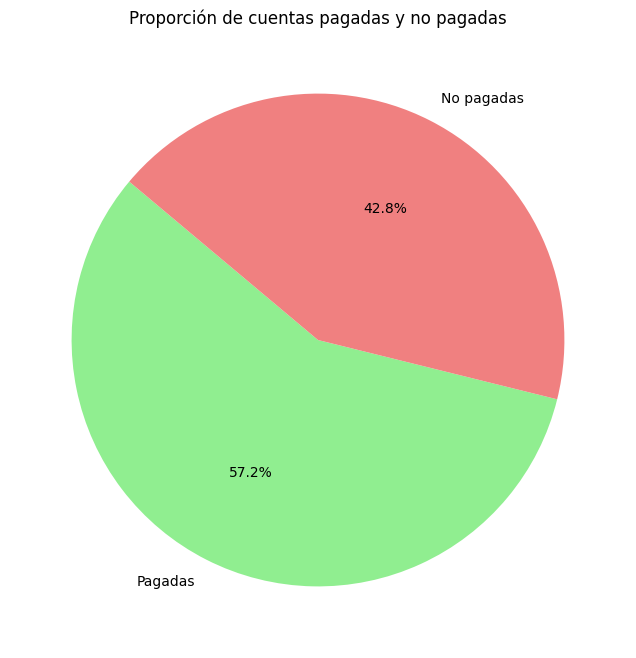

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# To convert the bar plot to a pie chart, we'll use plt.pie instead of sns.barplot
cant_pagadas = df["Pagada?"].value_counts()["Si"]
cant_no_pagadas = df["Pagada?"].value_counts()["No"]

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.title("Proporción de cuentas pagadas y no pagadas")
plt.pie([cant_pagadas, cant_no_pagadas], labels=["Pagadas", "No pagadas"], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.show()


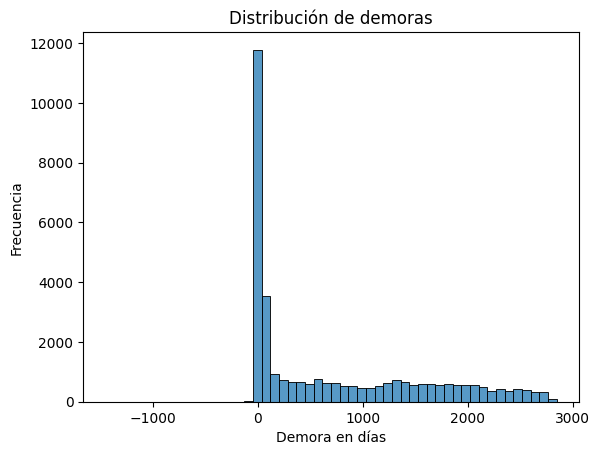

In [17]:
sns.histplot(df["Demora"])
plt.title("Distribución de demoras")
plt.xlabel("Demora en días")
plt.ylabel("Frecuencia")
plt.show()

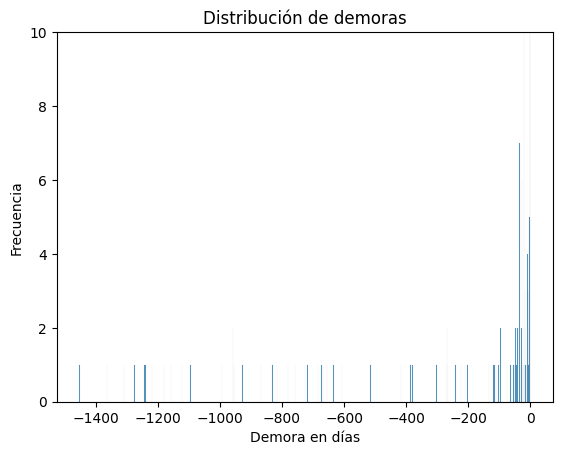

In [18]:
sns.histplot(df["Demora"].where(df["Demora"]<=0))
plt.title("Distribución de demoras")
plt.ylim(0,10)
plt.xlabel("Demora en días")
plt.ylabel("Frecuencia")
plt.show()

In [19]:
df["Demora"].where(df["Demora"]<0).value_counts().sum()

184

Se pueden observar que hay 184 valores negativos de la columna de Demora presentes en el dataset e incluso con valores por debajo de -1400. Esto puede deberse a errores en el registro de datos. Los valores negativos de la columna Demora serán removidos del dataset.

In [20]:
# remove rows with Demora<0

df = df.loc[df['Demora'] >= 0]
df.shape


(33040, 17)

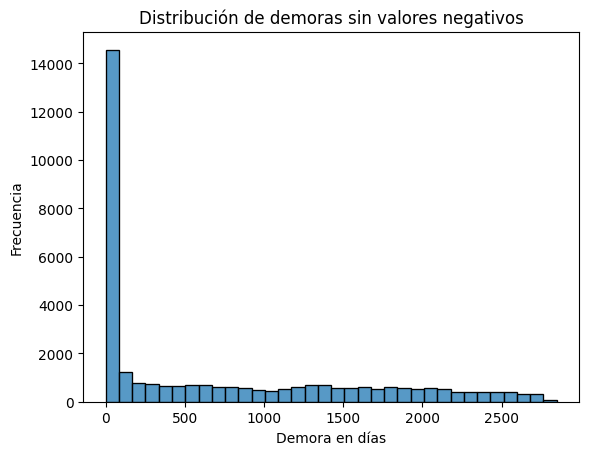

In [21]:
sns.histplot(df["Demora"])
plt.title("Distribución de demoras sin valores negativos")
plt.xlabel("Demora en días")
plt.ylabel("Frecuencia")
plt.show()

In [22]:
df['Demora'].describe()

count    33040.000000
mean       716.170369
std        842.884133
min          0.000000
25%         20.000000
50%        246.500000
75%       1372.000000
max       2847.000000
Name: Demora, dtype: float64

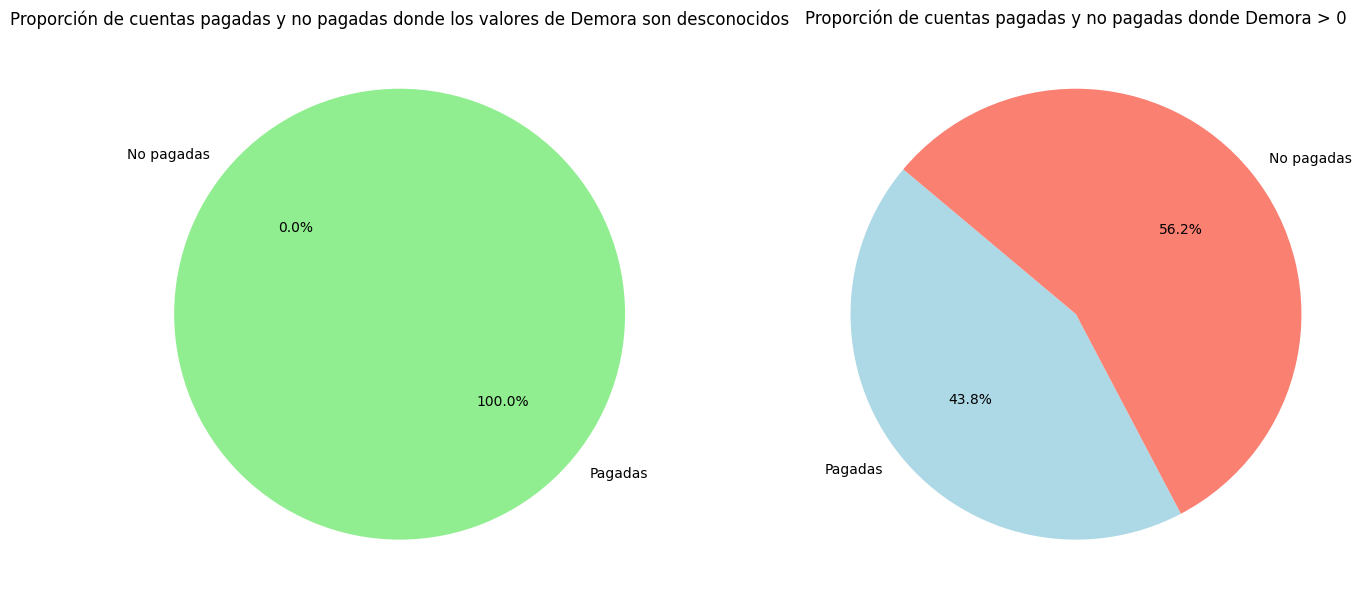

In [23]:
import matplotlib.pyplot as plt

# Suponiendo que df es tu DataFrame

# Cálculo para cuentas donde Demora es desconocido
cant_pagadas_desconocido = df[df['Demora'].isna()]["Pagada?"].value_counts().get("Si", 1)
cant_no_pagadas_desconocido = df[df['Demora'].isna()]["Pagada?"].value_counts().get("No", 0)

# Cálculo para cuentas donde Demora > 0
cant_pagadas_mayor_cero = df[df['Demora'] > 0]["Pagada?"].value_counts().get("Si", 1)
cant_no_pagadas_mayor_cero = df[df['Demora'] > 0]["Pagada?"].value_counts().get("No", 0)

# Crear un subplot con 1 fila y 2 columnas
fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de pastel para Demora desconocida
ax[0].set_title("Proporción de cuentas pagadas y no pagadas donde los valores de Demora son desconocidos")
ax[0].pie([cant_pagadas_desconocido, cant_no_pagadas_desconocido], labels=["Pagadas", "No pagadas"], autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])

# Gráfico de pastel para Demora > 0
ax[1].set_title("Proporción de cuentas pagadas y no pagadas donde Demora > 0")
ax[1].pie([cant_pagadas_mayor_cero, cant_no_pagadas_mayor_cero], labels=["Pagadas", "No pagadas"], autopct='%1.1f%%', startangle=140, colors=['lightblue', 'salmon'])

plt.show()


Se observa que todas las transacciones cuyos valores de demora no han sido registrados, han sido pagadas. Sin embargo, hay un elevado porcentaje de cuentas pagadas (43.8%) cuyo valor de demora es mayor que cero, por lo que no podemos asumir que dado que una cuenta fue pagada su valor demora será de cero.

In [24]:
df[(df['Demora']>0) & (df['Pagada?']=="Si")]['Demora'].describe()

count    14347.000000
mean        32.197463
std         58.368564
min          1.000000
25%          8.000000
50%         18.000000
75%         35.000000
max       1420.000000
Name: Demora, dtype: float64

In [25]:
# prompt: quartile 90% de df[(df['Demora']>0) & (df['Pagada?']=="Si")]['Demora']

df[(df['Demora']>0) & (df['Pagada?']=="Si")]['Demora'].quantile(0.90)


64.0

En el  análisis de los descriptores estadísticos de la variable Demora se observa que el 90% de las cuentas pagadas tienen un retraso igual o menor a 64 días. Esto puede ser útil para la imputación de valores a la hora de entrenar el modelo predictivo.

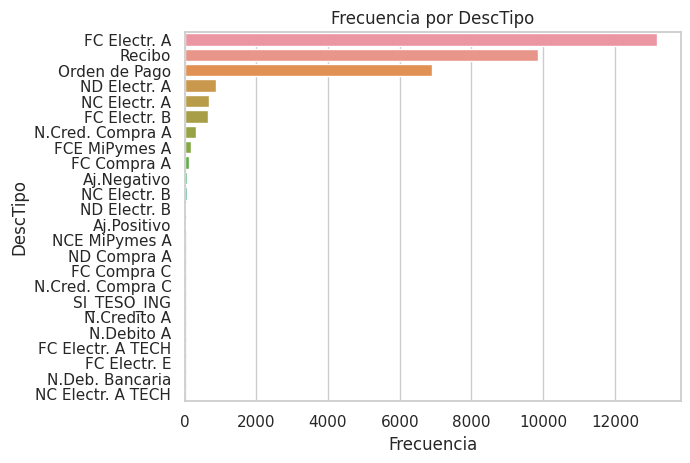

In [26]:
sns.set(style="whitegrid")

# Prepara los datos (puedes adaptar esto a tus datos)
tipo_descuento = df['DescTipo'].value_counts().reset_index()
tipo_descuento.columns = ['DescTipo', 'Cantidad']

# Crea el gráfico de barras
sns.barplot(x='Cantidad', y='DescTipo', data=tipo_descuento)

# Personaliza con títulos y etiquetas
plt.title('Frecuencia por DescTipo')
plt.xlabel('Frecuencia')
plt.ylabel('DescTipo')

# Muestra el gráfico
plt.show()


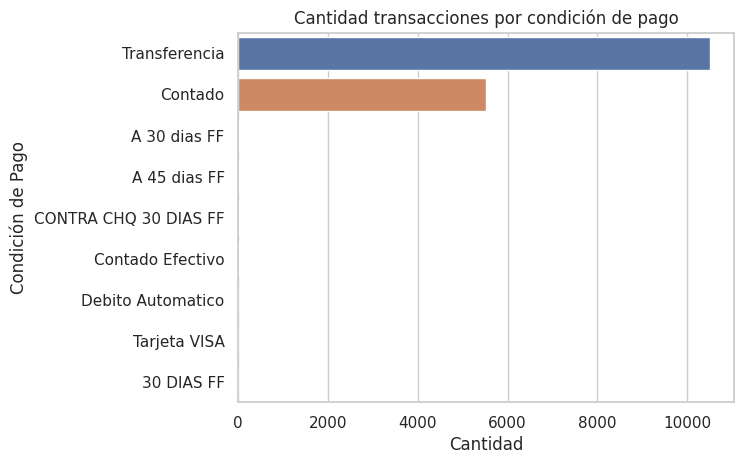

In [27]:
# Distribución de Desc_tipo
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Prepara los datos
condicion_pago = df['Desc_CondicionPago'].value_counts().reset_index()
condicion_pago.columns = ['Condición de Pago', 'Cantidad']

# Crea el gráfico de barras
sns.barplot(x='Cantidad', y='Condición de Pago', data=condicion_pago)

# Personaliza con títulos y etiquetas
plt.title('Cantidad transacciones por condición de pago')
plt.xlabel('Cantidad')
plt.ylabel('Condición de Pago')

# Muestra el gráfico
plt.show()


In [28]:
condicion_pago

,Condición de Pago,Cantidad
0,Transferencia,10509
1,Contado,5531
2,A 30 dias FF,36
3,A 45 dias FF,28
4,CONTRA CHQ 30 DIAS FF,14
5,Contado Efectivo,14
6,Debito Automatico,11
7,Tarjeta VISA,6
8,30 DIAS FF,1


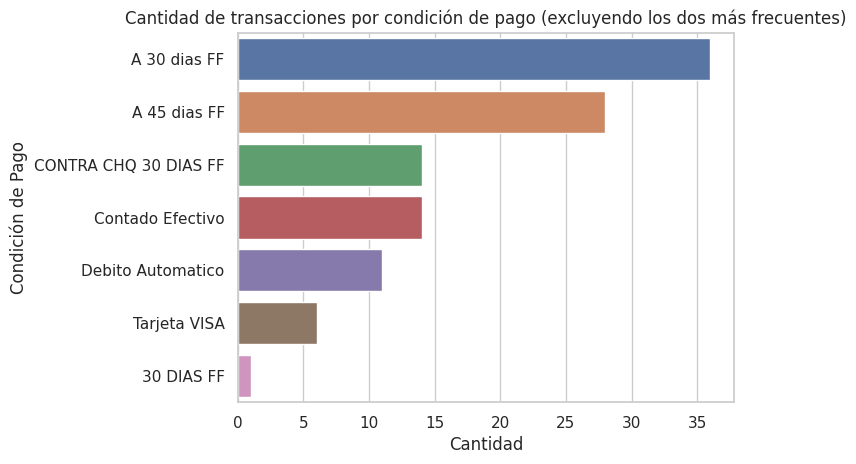

In [29]:
# Establece el estilo de Seaborn
sns.set(style="whitegrid")

# Calcula las frecuencias de cada tipo de condición de pago y las ordena
condicion_pago_frecuencias = df['Desc_CondicionPago'].value_counts()

# Excluye los dos tipos más frecuentes
condicion_pago_frecuencias = condicion_pago_frecuencias.iloc[2:]

# Convierte las frecuencias a DataFrame para Seaborn
condicion_pago = condicion_pago_frecuencias.reset_index()
condicion_pago.columns = ['Condición de Pago', 'Cantidad']

# Crea el gráfico de barras
sns.barplot(x='Cantidad', y='Condición de Pago', data=condicion_pago)

# Personaliza con títulos y etiquetas
plt.title('Cantidad de transacciones por condición de pago (excluyendo los dos más frecuentes)')
plt.xlabel('Cantidad')
plt.ylabel('Condición de Pago')

# Muestra el gráfico
plt.show()


In [30]:
df.ImporteTotal.describe()

count    3.304000e+04
mean     8.178279e+04
std      2.311040e+05
min      1.000000e+00
25%      4.636382e+03
50%      1.922327e+04
75%      6.582400e+04
max      8.865384e+06
Name: ImporteTotal, dtype: float64

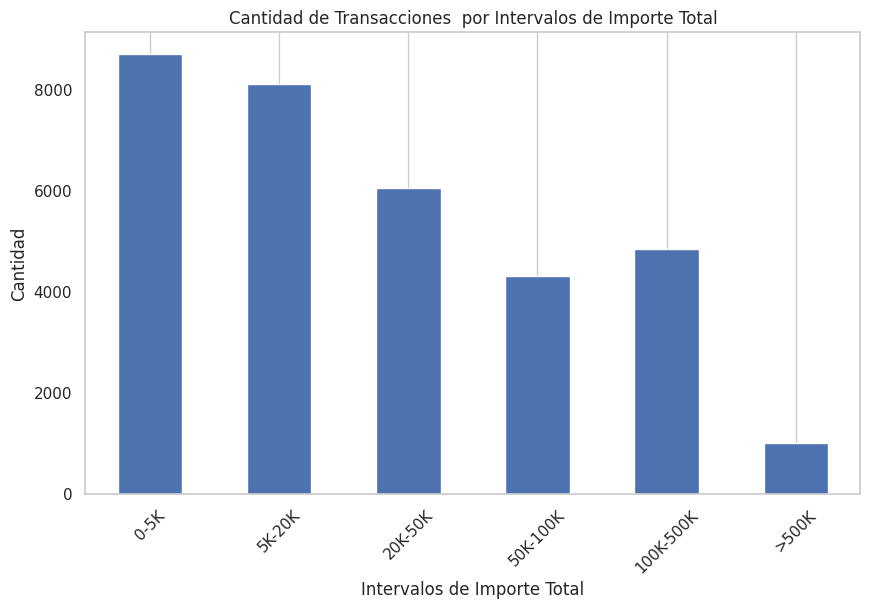

In [31]:
# Defining intervals for ImporteTotal
bins = [0, 5000, 20000, 50000, 100000, 500000, df['ImporteTotal'].max()]
labels = ['0-5K', '5K-20K', '20K-50K', '50K-100K', '100K-500K', '>500K']

# Create a new column for interval categories
df['ImporteTotal_Interval'] = pd.cut(df['ImporteTotal'], bins=bins, labels=labels, include_lowest=True)

# Group by the new interval categories and count the number of transactions
interval_counts = df['ImporteTotal_Interval'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
interval_counts.plot(kind='bar')
plt.title('Cantidad de Transacciones  por Intervalos de Importe Total')
plt.xlabel('Intervalos de Importe Total')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

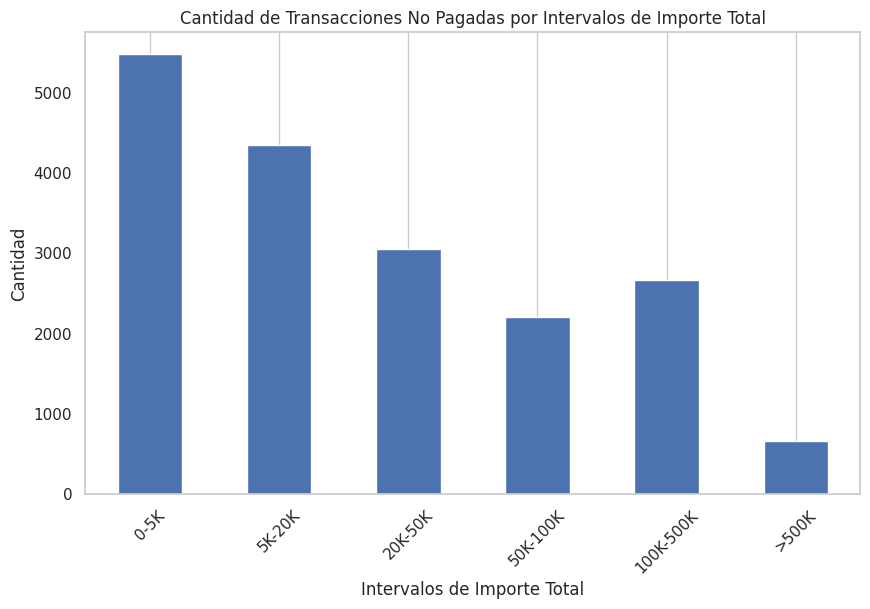

In [32]:
# Defining intervals for ImporteTotal
bins = [0, 5000, 20000, 50000, 100000, 500000, df['ImporteTotal'].max()]
labels = ['0-5K', '5K-20K', '20K-50K', '50K-100K', '100K-500K', '>500K']

# Create a new column for interval categories
df['ImporteTotal_Interval'] = pd.cut(df['ImporteTotal'], bins=bins, labels=labels, include_lowest=True)

# Group by the new interval categories and count the number of transactions
interval_counts = df[df["Pagada?"]=="No"]['ImporteTotal_Interval'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
interval_counts.plot(kind='bar')
plt.title('Cantidad de Transacciones No Pagadas por Intervalos de Importe Total')
plt.xlabel('Intervalos de Importe Total')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

La cantidad de transacciones no pagadas mantienen una distribución similar a la cantitad total de transacciones para cada intervalo de importe total.

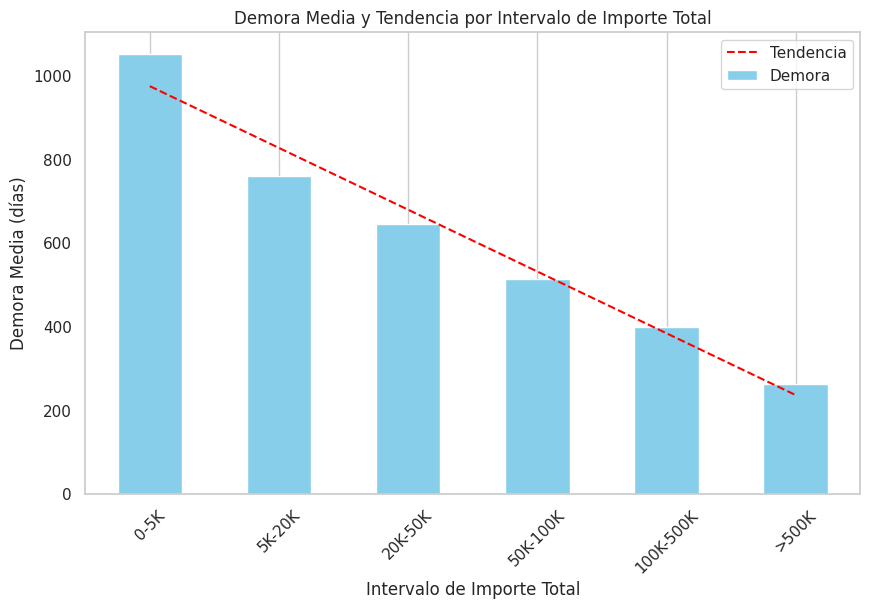

In [33]:
# Plotting the mean delay by import total interval
# Calculating the mean delay ('Demora') for each interval of 'ImporteTotal'
mean_delay_by_interval = df.groupby('ImporteTotal_Interval')['Demora'].mean()
# Plotting the mean delay by import total interval with a trend line

# Creating the bar plot
fig, ax = plt.subplots(figsize=(10, 6))
mean_delay_by_interval.plot(kind='bar', color='skyblue', ax=ax)
ax.set_title('Demora Media y Tendencia por Intervalo de Importe Total')
ax.set_xlabel('Intervalo de Importe Total')
ax.set_ylabel('Demora Media (días)')
ax.tick_params(axis='x', rotation=45)

# Creating the trend line
# Since the x-axis is categorical, we need to use numerical values for trend line plotting
x = range(len(mean_delay_by_interval))
z = np.polyfit(x, mean_delay_by_interval, 1)
p = np.poly1d(z)

# Adding the trend line to the plot
ax.plot(x, p(x), color='red', linestyle='--', label='Tendencia')
ax.legend()
ax.grid(axis='y')

plt.show()



La demora media por cada intervalo de 'ImporteTotal' es la siguiente:

Para el intervalo de 0-5K: aproximadamente 968.9 días
Para el intervalo de 5K-20K: aproximadamente 717.9 días
Para el intervalo de 20K-50K: aproximadamente 606.8 días
Para el intervalo de 50K-100K: aproximadamente 497.8 días
Para el intervalo de 100K-500K: aproximadamente 394.9 días
Para el intervalo mayor a 500K: aproximadamente 261.0 días
Estos resultados muestran una tendencia interesante: a medida que aumenta el importe total de la transacción, la demora media tiende a disminuir. Las transacciones con importes menores tienden a tener mayores demoras en promedio. Es importante notar que las demoras medias son elevadas estando casi todas por encima del año. Hay que consultar con las fuentes del datset si estos valores son congruentes con la realidad empresarial o si hay alguna desviación en el dataset.​

In [34]:
df['Days_to_Pay'] = (df['Fecha_Vencimiento'] - df['Fecha_Emision']).dt.days
df.Days_to_Pay.unique()

array([ 5, 30, 45,  0])

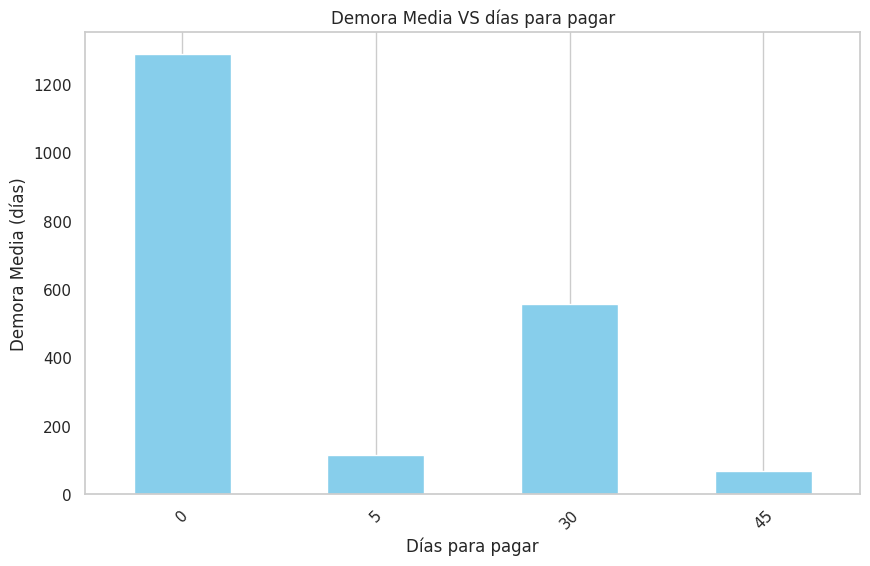

In [35]:
mean_delay_by_day_interval = df.groupby('Days_to_Pay')['Demora'].mean()
plt.figure(figsize=(10, 6))
mean_delay_by_day_interval.plot(kind='bar', color='skyblue')
plt.title('Demora Media VS días para pagar')
plt.xlabel('Días para pagar')
plt.ylabel('Demora Media (días)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [36]:
mean_delay_by_day_interval

Days_to_Pay
0     1288.805786
5      114.956841
30     559.019608
45      68.714286
Name: Demora, dtype: float64

La mayor demora media con diferencia se acumulan en las transacciones que tienen cero días para pagar

In [37]:
df[df["Days_to_Pay"]==0].shape[0]

16904

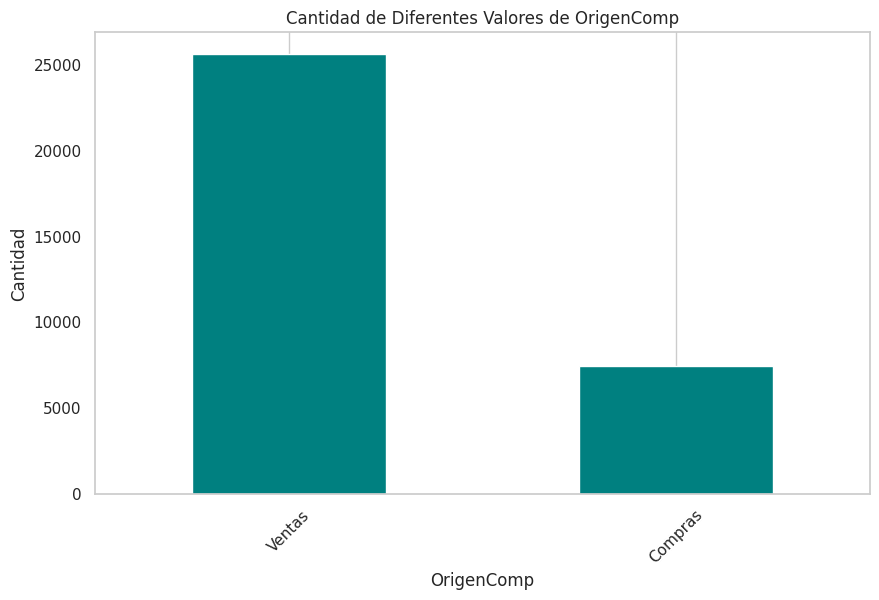

In [38]:
# Calculating the count of unique values in the 'OrigenComp' column
origen_comp_counts = df['OrigenComp'].value_counts()

# Plotting the data
plt.figure(figsize=(10, 6))
origen_comp_counts.plot(kind='bar', color='teal')
plt.title('Cantidad de Diferentes Valores de OrigenComp')
plt.xlabel('OrigenComp')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [39]:
mean_delay_by_org_comp = df.groupby('OrigenComp')['Demora'].mean()
mean_delay_by_org_comp

OrigenComp
Compras    1344.583311
Ventas      533.474490
Name: Demora, dtype: float64

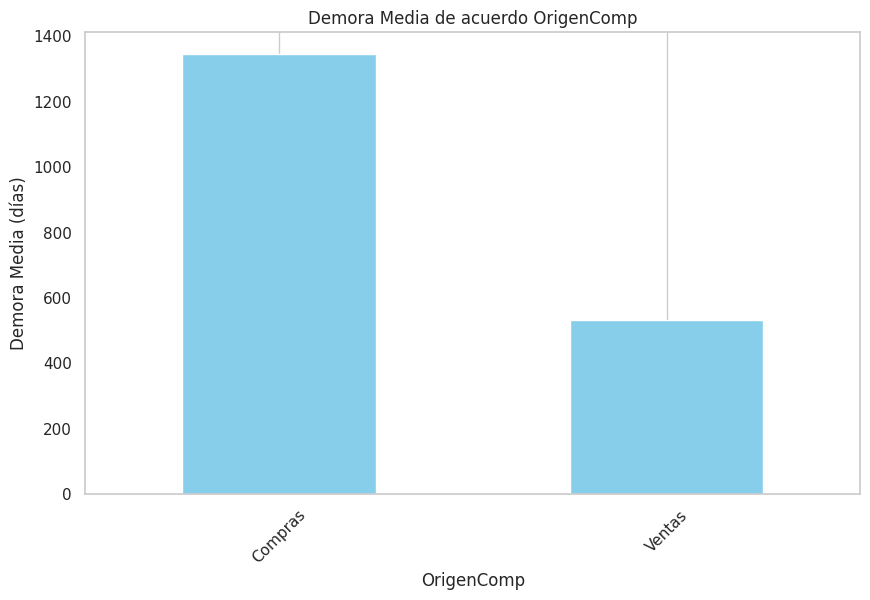

In [40]:
plt.figure(figsize=(10, 6))
mean_delay_by_org_comp.plot(kind='bar', color='skyblue')
plt.title('Demora Media de acuerdo OrigenComp')
plt.xlabel('OrigenComp')
plt.ylabel('Demora Media (días)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Desarrollo de modelos predictvos

### Preprocesamiento general

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Preprocesamiento y selección de columnas
# Calcula la media y la desviación estándar
media = df['Demora'].mean()
desviacion_estandar = df['Demora'].std()

# Definir el número de desviaciones estándar para considerar un valor como outlier
n_desviaciones = 1

# Calcular los límites para los valores normales
limite_inferior = media - n_desviaciones * desviacion_estandar
limite_superior = media + n_desviaciones * desviacion_estandar

# Filtrar los outliers
df_sin_outliers = df[(df['Demora'] >= limite_inferior) & (df['Demora'] <= limite_superior)]
df_selected = df_sin_outliers [['Pagada?','Fecha_Emision', 'Fecha_Vencimiento', 'Days_to_Pay', 'Desc_CondicionPago', 'ImporteTotal', 'DescTipo', 'OrigenComp', 'Demora']]

# Remover todos los valores NaN de Demora
df_selected = df_selected.dropna(subset=['Demora'])


# Crear bins para la variable 'Demora'
bins = pd.cut(df_selected['Demora'], bins=[-1, 100, 500, 1000, 1500, 2000, 2500, 2802], labels=False)

# Dividir el DataFrame en características (X) y etiqueta (y)
X = df_selected.drop('Demora', axis=1)
y = df_selected['Demora']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=bins, random_state=42)

# Dividir los datos de entrenamiento en conjuntos de entrenamiento y validación
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, stratify=bins.loc[y_temp.index], random_state=42)
# Crear la segunda variable dependiente
y_train_2 = X_train["Pagada?"]
y_valid_2 = X_valid["Pagada?"]
y_test_2 = X_test["Pagada?"]

# Remover "Pagada?"
X_train = X_train.drop("Pagada?", axis=1)
X_valid = X_valid.drop("Pagada?",axis=1)
X_test = X_test.drop("Pagada?", axis=1)

##Guardar Particiones de Conjuntos de datos
# X_train.to_excel("x_train.xlsx")
# X_valid.to_excel("x_valid.xlsx")
# X_test.to_excel("x_test.xlsx")
# y_train.to_excel("y_train.xlsx")
# y_train_2.to_excel("y_train_2.xlsx")
# y_valid.to_excel("y_valid.xlsx")
# y_valid_2.to_excel("y_valid_2.xlsx")
# y_test.to_excel("y_test.xlsx")
# y_test_2.to_excel("y_test_2.xlsx")

# Ahora se tiene
# X_train, y_train: Conjunto de entrenamiento
# X_valid, y_valid: Conjunto de validación
# X_test, y_test: Conjunto de prueba


In [42]:
# Load train, valid and test datasets
# X_train = pd.read_excel("x_train.xlsx")
# X_valid = pd.read_excel("x_valid.xlsx")
# X_test = pd.read_excel("x_test.xlsx")
# y_train = pd.read_excel("y_train.xlsx")["Demora"]
# y_train_2 = pd.read_excel("y_train_2.xlsx")["Pagada?"]
# y_valid = pd.read_excel("y_valid.xlsx")["Demora"]
# y_test = pd.read_excel("y_test.xlsx")["Demora"]
# y_valid_2 = pd.read_excel("y_valid_2.xlsx")["Pagada?"]
# y_test_2 = pd.read_excel("y_test_2.xlsx")["Pagada?"]


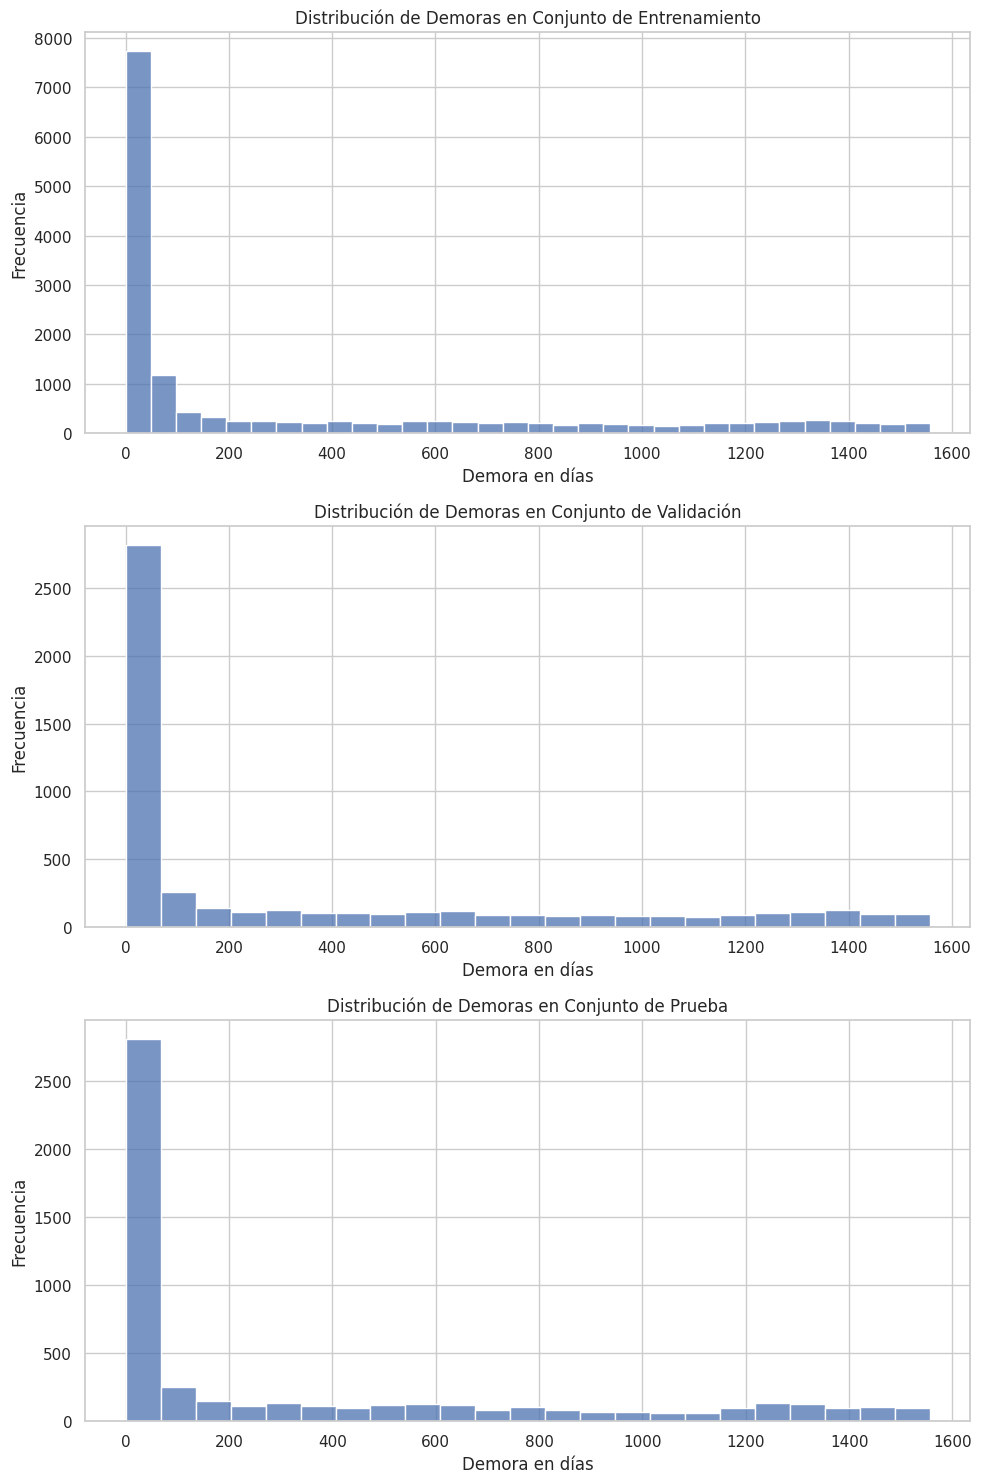

In [43]:
# Crear subplots para las distribuciones de y_train, y_valid, y_test
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para y_train
sns.histplot(y_train, ax=axs[0])
axs[0].set_title("Distribución de Demoras en Conjunto de Entrenamiento")
axs[0].set_xlabel("Demora en días")
axs[0].set_ylabel("Frecuencia")

# Gráfico para y_valid
sns.histplot(y_valid, ax=axs[1])
axs[1].set_title("Distribución de Demoras en Conjunto de Validación")
axs[1].set_xlabel("Demora en días")
axs[1].set_ylabel("Frecuencia")

# Gráfico para y_test
sns.histplot(y_test, ax=axs[2])
axs[2].set_title("Distribución de Demoras en Conjunto de Prueba")
axs[2].set_xlabel("Demora en días")
axs[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

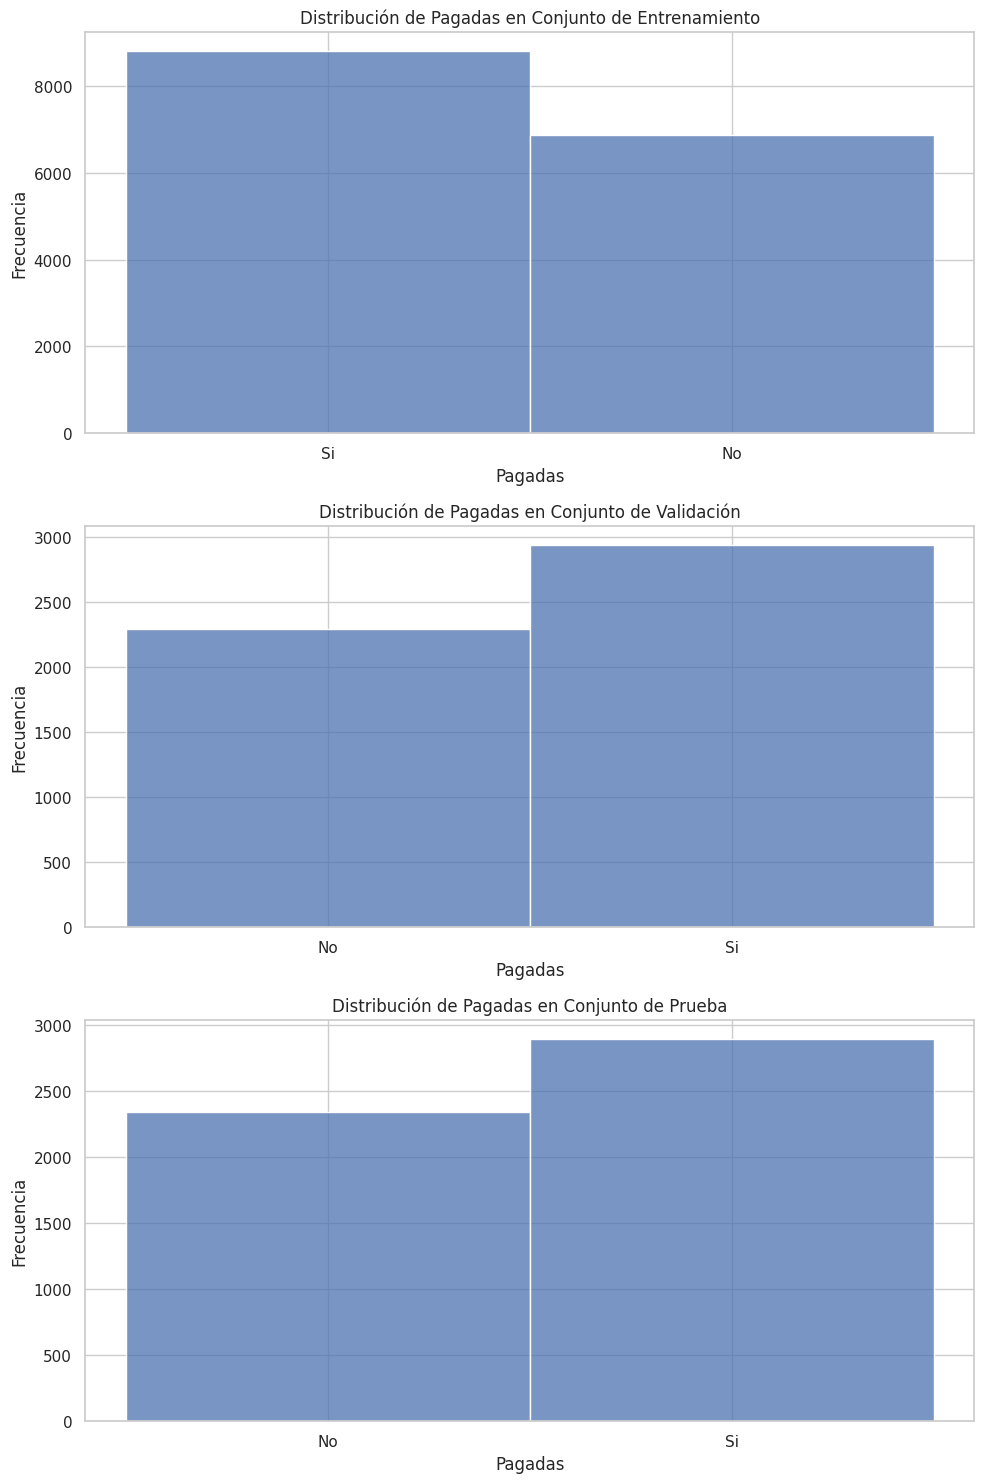

In [44]:
# Crear subplots para las distribuciones de y_train, y_valid, y_test
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico para y_train
sns.histplot(y_train_2, ax=axs[0])
axs[0].set_title("Distribución de Pagadas en Conjunto de Entrenamiento")
axs[0].set_xlabel("Pagadas")
axs[0].set_ylabel("Frecuencia")

# Gráfico para y_valid
sns.histplot(y_valid_2, ax=axs[1])
axs[1].set_title("Distribución de Pagadas en Conjunto de Validación")
axs[1].set_xlabel("Pagadas")
axs[1].set_ylabel("Frecuencia")

# Gráfico para y_test
sns.histplot(y_test_2, ax=axs[2])
axs[2].set_title("Distribución de Pagadas en Conjunto de Prueba")
axs[2].set_xlabel("Pagadas")
axs[2].set_ylabel("Frecuencia")

plt.tight_layout()
plt.show()

### RandomForestRegressor

In [45]:
# Preprocesamiento para datos numéricos y categóricos
numeric_features = ['ImporteTotal', 'Days_to_Pay']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['DescTipo', 'Desc_CondicionPago', 'OrigenComp']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Definición del modelo
rf = RandomForestRegressor(random_state=42, n_estimators=100)

# Creación del Pipeline
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf)])

# Entrenamiento del modelo
pipeline_1.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline_1.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Métricas del RandomForestRegressor con 100 estimadores")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')


Métricas del RandomForestRegressor con 100 estimadores
MSE: 97832.92434113748, MAE: 171.85947321799364, R^2: 0.5689540882282507


El modelo de RandomForestRegressor no presenta un buen rendimiento. Probaremos con diferentes modelos para ver si el rendimiento mejora.

### Modelo SVM

In [46]:
# Importar SVR
from sklearn.svm import SVR

# Definición del modelo
svm_reg = SVR(kernel='rbf')  # Puedes cambiar el kernel y otros parámetros según sea necesario

# Creación del Pipeline
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', svm_reg)])

# Entrenamiento del modelo
pipeline_1.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline_1.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Métricas del SVR con kernel RBF, o Radial Basis Function")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')


Métricas del SVR con kernel RBF, o Radial Basis Function
MSE: 98081.2680745169, MAE: 185.34184646970266, R^2: 0.5678599008500419


In [47]:
# Definición del modelo
svm_reg_2 = SVR(kernel='poly', degree=3)

# Creación del Pipeline
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', svm_reg_2)])

# Entrenamiento del modelo
pipeline_1.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline_1.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Métricas del SVR con kernel polinomial de grado 3")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

Métricas del SVR con kernel polinomial de grado 3
MSE: 103134.73614728464, MAE: 188.652942860116, R^2: 0.5455946280116253


El modelo SVM tampoco ofrece buenos resultados

### XGBRegressor

In [48]:
# Importar XGBRegressor
from xgboost import XGBRegressor

# Definición del modelo XGBoost
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=300, random_state=42)

# Creación del Pipeline
pipeline_1 = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', xgb_model)])

# Entrenamiento del modelo
pipeline_1.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline_1.predict(X_valid)
mse = mean_squared_error(y_valid, y_pred)
mae = mean_absolute_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("Métricas del XGBRegressor")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')


Métricas del XGBRegressor
MSE: 82518.0916378171, MAE: 168.26494817626957, R^2: 0.6364303092519203


El modelo XGBRegressor  aún sigue teniendo un mal rendimiento. Parece indicar que el cuello de botella se encuentra en las características de los datos, así como el preprocesamiento y las features usadas,  y no en el modelo usado. Se realizará un tipo de preprocesamiento diferente.

### RandomForestRegressor con TabularProcs de Fastai

---



In [49]:
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from IPython.display import Image, display_svg, SVG
import warnings
warnings.filterwarnings("ignore")


**Manejo de fechas**

En la primera etapa de la preparación de datos, se debe enriquecer la representación de las fechas. La base esencial del árbol de decisión, que es el modelo base del random forest, se basa en la bisección, que implica dividir un grupo en dos. Se examinan las variables ordinales y se divide el conjunto de datos según si el valor de la variable es mayor o menor que un umbral. Asimismo, se observan las variables categóricas y se divide el conjunto de datos según el nivel particular de la variable. En consecuencia, este algoritmo tiene una forma de dividir el conjunto de datos considerando tanto datos ordinales como categóricos.

Sin embargo, ¿cómo se aplica esto a un tipo de dato común, como las fechas? Es posible considerar una fecha como un valor ordinal, ya que tiene sentido decir que una fecha es mayor o menor que otra. No obstante, las fechas son algo distintas a la mayoría de los valores ordinales, dado que algunas fechas son cualitativamente diferentes de otras, de una manera que a menudo resulta relevante para los sistemas que se están modelando.

Para permitir que el algoritmo maneje las fechas de manera más inteligente, es importante que el modelo disponga de información más allá de simplemente determinar si una fecha es más reciente o menos reciente que otra. Puede ser deseable que el modelo tome decisiones basadas en el día de la semana de la fecha, si se trata de un día feriado, en qué mes se encuentra, entre otros aspectos. Para lograrlo, se reemplaza cada columna de fecha con un conjunto de columnas de metadatos de fecha, como feriado, día de la semana y mes. Estas columnas proporcionan datos categóricos que se consideran útiles para el análisis.

In [50]:
X_train_2 = add_datepart(X_train, 'Fecha_Emision')
X_train_2 = add_datepart(X_train_2, 'Fecha_Vencimiento')
X_valid_2 = add_datepart(X_valid, 'Fecha_Emision')
X_valid_2 = add_datepart(X_valid_2, 'Fecha_Vencimiento')
X_test_2 = add_datepart(X_test, 'Fecha_Emision')
X_test_2 = add_datepart(X_test_2, 'Fecha_Vencimiento')

In [51]:
# Concatenar los DataFrames
', '.join(o for o in X_train_2 if o.startswith('Fecha'))

'Fecha_EmisionYear, Fecha_EmisionMonth, Fecha_EmisionWeek, Fecha_EmisionDay, Fecha_EmisionDayofweek, Fecha_EmisionDayofyear, Fecha_EmisionIs_month_end, Fecha_EmisionIs_month_start, Fecha_EmisionIs_quarter_end, Fecha_EmisionIs_quarter_start, Fecha_EmisionIs_year_end, Fecha_EmisionIs_year_start, Fecha_EmisionElapsed, Fecha_VencimientoYear, Fecha_VencimientoMonth, Fecha_VencimientoWeek, Fecha_VencimientoDay, Fecha_VencimientoDayofweek, Fecha_VencimientoDayofyear, Fecha_VencimientoIs_month_end, Fecha_VencimientoIs_month_start, Fecha_VencimientoIs_quarter_end, Fecha_VencimientoIs_quarter_start, Fecha_VencimientoIs_year_end, Fecha_VencimientoIs_year_start, Fecha_VencimientoElapsed'

Se pueden ver que ahora hay muchas columnas nuevas en el DataFrame:

**Utilizando TabularPandas y TabularProc**

Una etapa adicional en el preprocesamiento de datos implica garantizar la capacidad de manejar cadenas de texto y valores faltantes. En su estado predeterminado, scikit-learn no es capaz de abordar ambas situaciones. En su lugar, optaremos por utilizar la clase TabularPandas de fastai, que envuelve un DataFrame de Pandas y ofrece algunas comodidades adicionales. Para completar la transformación con TabularPandas, haremos uso de dos TabularProcs: Categorify y FillMissing. Un TabularProc se comporta como una Transformación regular, con la diferencia de que:

1. Modifica el objeto original y lo devuelve sin cambios.
2. Ejecuta la transformación una sola vez, al procesar los datos por primera vez, en lugar de hacerlo de manera perezosa al acceder a los datos.

Categorify es un TabularProc que reemplaza una columna con una versión numérica categórica de la misma. Por otro lado, FillMissing es un TabularProc que sustituye los valores faltantes con la mediana de la columna correspondiente, al mismo tiempo que crea una nueva columna booleana establecida en True para indicar cualquier fila con valores faltantes. Estas dos transformaciones son esenciales en prácticamente todos los conjuntos de datos tabulares que se manejan, por lo que constituyen un sólido punto de partida en el procesamiento de datos.

In [52]:
fastai_df_train = X_train_2
fastai_df_valid = X_valid_2
fastai_df_test = X_test_2
fastai_df_test_2 = X_test_2

fastai_df_train["Demora"] = y_train
fastai_df_train["is_valid"]=False
fastai_df_valid["Demora"] = y_valid
fastai_df_valid["is_valid"]=True

fastai_dataset = pd.concat([fastai_df_train,fastai_df_valid]).reset_index(drop=True)
fastai_df_test["Demora"] = y_test
fastai_df_test_2["Pagada?"]=y_test_2


# Definir los índices de splits
train_idx = fastai_dataset[fastai_dataset['is_valid'] == False].index
valid_idx = fastai_dataset[fastai_dataset['is_valid'] == True].index

# Crear los splits para Fastai
splits = (list(train_idx), list(valid_idx))

# Asumiendo que tienes definidos procs, cat, cont, y_names
procs = [FillMissing, Categorify, Normalize]
cat = ['DescTipo', 'Desc_CondicionPago', 'OrigenComp']
cont = ['ImporteTotal', 'Days_to_Pay','Fecha_EmisionYear', 'Fecha_EmisionMonth', 'Fecha_EmisionWeek',
        'Fecha_EmisionDay', 'Fecha_EmisionDayofweek', 'Fecha_EmisionDayofyear', 'Fecha_EmisionIs_month_end',
        'Fecha_EmisionIs_month_start', 'Fecha_EmisionIs_quarter_end', 'Fecha_EmisionIs_quarter_start',
        'Fecha_EmisionIs_year_end', 'Fecha_EmisionIs_year_start', 'Fecha_EmisionElapsed',
        'Fecha_VencimientoYear', 'Fecha_VencimientoMonth', 'Fecha_VencimientoWeek', 'Fecha_VencimientoDay',
        'Fecha_VencimientoDayofweek', 'Fecha_VencimientoDayofyear', 'Fecha_VencimientoIs_month_end',
        'Fecha_VencimientoIs_month_start', 'Fecha_VencimientoIs_quarter_end',
        'Fecha_VencimientoIs_quarter_start', 'Fecha_VencimientoIs_year_end',
        'Fecha_VencimientoIs_year_start', 'Fecha_VencimientoElapsed' ]
y_names = 'Demora'
# Crear el objeto TabularPandas
to = TabularPandas(fastai_dataset, procs, cat, cont, y_names='Demora', splits=(list(train_idx), list(valid_idx)))

xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y



En la siguiente definición de función, n_estimatorsse define la cantidad de árboles que queremos, max_samplesdefine cuántas filas muestrear para entrenar cada árbol y max_featuresdefine cuántas columnas muestrear en cada punto de división (donde 0.5significa "tomar la mitad del número total de columnas"). También podemos especificar cuándo dejar de dividir los nodos del árbol, limitando efectivamente la profundidad del árbol, al incluir el mismo min_samples_leafparámetro que usamos en la última sección. Finalmente, pasamos n_jobs=-1a decirle a sklearn que use todas nuestras CPU para construir los árboles en paralelo. Al crear una pequeña función para esto, se pueden probar más rápidamente diferentes variaciones usando fastai

In [53]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators, random_state=42,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [54]:
rf_fastai_model = rf(xs, y, max_samples=2000);

In [55]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)
def m_mae(m, xs, y): return round(mean_absolute_error(m.predict(xs), y), 6)
def m_mse(m, xs, y): return round(mean_squared_error(m.predict(xs), y), 6)
def m_r2(m, xs, y): return round(r2_score(m.predict(xs), y), 6)

In [56]:
# Evaluación del modelo
mse = m_mse(rf_fastai_model, valid_xs, valid_y)
mae = m_mae(rf_fastai_model, valid_xs, valid_y)
r2 = m_r2(rf_fastai_model, valid_xs, valid_y)


print("Métricas del RadomForestRegresor con TabularProcs de Fastai")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

Métricas del RadomForestRegresor con TabularProcs de Fastai
MSE: 4391.454776, MAE: 23.534193, R^2: 0.979792


Mucho mejor! El el rendimiento es casi 10 veces superior que los anteriores enfoques para el MAE, 50 veces para el MSE y es casi perfecto para el R2 score, pero sigue habiendo margen de mejora, principalmente en las métricas MAE y MSE.
Probaremos a optimizar el número de estimadores del modelo. Para ver el impacto de n_estimators, obtengamos las predicciones de cada árbol individual en nuestro bosque.

In [57]:
preds = np.stack([t.predict(valid_xs) for t in rf_fastai_model.estimators_])
train_preds = np.stack([t.predict(xs) for t in rf_fastai_model.estimators_])

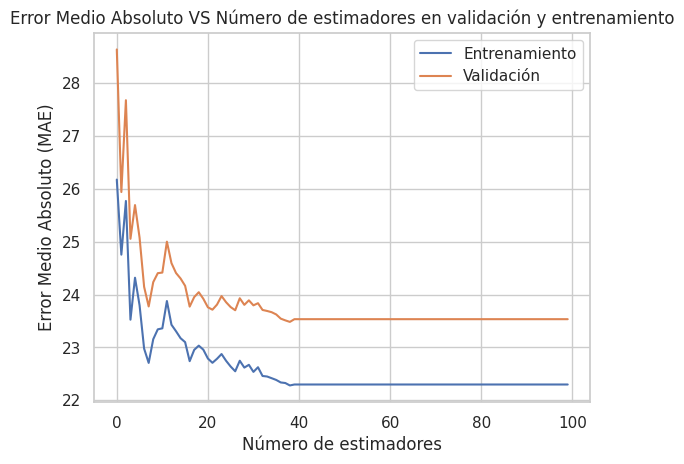

In [58]:
plt.title("Error Medio Absoluto VS Número de estimadores en validación y entrenamiento")
plt.xlabel("Número de estimadores")
plt.ylabel("Error Medio Absoluto (MAE)")

# Plotear el error medio absoluto para el conjunto de entrenamiento
plt.plot([mean_absolute_error(train_preds[:i+1].mean(0), y) for i in range(100)], label='Entrenamiento')

# Plotear el error medio absoluto para el conjunto de validación
plt.plot([mean_absolute_error(preds[:i+1].mean(0), valid_y) for i in range(100)], label='Validación')

# Agregar una leyenda para identificar las líneas
plt.legend()

# Mostrar el gráfico
plt.show()




En la  se observa que el mínimo del MAE se alcanza para un número de estimadores de 4 sin embargo un modelo de random forest con un número demasiado bajo de estimadores puede sufrir de underfiting si decidimos agregarle más características para mejorar su precisión. Basado en esto es preferible elegir un número de estimadores en el intervalo de [20, 40], ya que por encima de este intervalo el MAE empeora y se estabiliza, y en este intervalo tentativamente se alcanza un equilibrio entre un modelo que puede mejorarse con más features y un buen valor de MAE. Basado en esto, se seleccionará un número de 30 estimadores ya que es el que tiene el menor MAE en ese intervalo.

In [59]:
rf_fastai_model = rf(xs, y, max_samples=2000, n_estimators=40);
# Evaluación del modelo
mse = m_mse(rf_fastai_model, valid_xs, valid_y)
mae = m_mae(rf_fastai_model, valid_xs, valid_y)
r2 = m_r2(rf_fastai_model, valid_xs, valid_y)


print("Métricas del RadomForestRegresor con TabularProcs de Fastai")
print(f'MSE: {mse}, MAE: {mae}, R^2: {r2}')

Métricas del RadomForestRegresor con TabularProcs de Fastai
MSE: 4391.454776, MAE: 23.534193, R^2: 0.979792


Se observa una mejora en todas las métricas. Otroaspecto que se puede notar de la gráfica es que el rendimiento en nuestro conjunto de validación es peor que en nuestro conjunto de entrenamiento. Esto puede deberse a que existe un ligero sobreajuste en el modelo o a que el conjunto de validación representa un conjunto de muestras con caractericas diferentes. Para analizar las causas en detalle se hay que mirar de cerca el funcionamiento del modelo.

#### Error de falta de bolsa
 Un bosque aleatorio, cada árbol se entrena con un subconjunto diferente de datos de entrenamiento. El error fuera de bolsa OOB es una forma de medir el error de predicción en el conjunto de entrenamiento al incluir solo en el cálculo de los árboles de error de una fila donde esa fila no se incluyó en el entrenamiento. Esto nos permite ver si el modelo se está sobreajustando, sin necesidad de un conjunto de validación separado.  Las predicciones OOB están disponibles en el atributo oob_prediction_. Tenga en cuenta que las comparamos con las etiquetas de entrenamiento, ya que se calculan en árboles utilizando el conjunto de entrenamiento.

In [60]:
mae_oob = mean_absolute_error(rf_fastai_model.oob_prediction_, y)
r2_oob = r2_score(rf_fastai_model.oob_prediction_, y)

print(f"MAE OOB: {mae_oob}, R^2 OOB: {r2_oob}")

MAE OOB: 23.37997185657, R^2 OOB: 0.9825376311384973


Las métricas de OOB son bastantes cercanas a a las del conjunto de validación. Por lo que parece que el error OOB no afecta nuestro modelo

### Modelo de Redes Neuronales  con Categorical Embeddings para datos tabulares

Probaremos implementar un modelo de redes neuronales y aplicando la técnnica de Categorical Embeddings para explotar las similitudes entre las variables.

In [61]:
# Creando dataloadders
dls =to.dataloaders(2048)
y = to.train.y
y.min(),y.max()

(0.0, 1558.0)

In [62]:
learn = tabular_learner(dls, y_range=(y.min(),y.max()), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

SuggestedLRs(valley=0.00363078061491251)

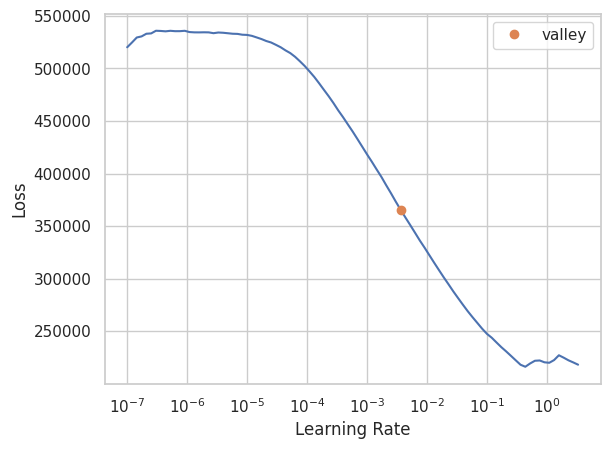

In [63]:
# Buascando el learning rate óptimo
learn.lr_find()

In [64]:
learn.fit_one_cycle(300, 1e-3)

epoch,train_loss,valid_loss,time
0,488599.281250,410382.812500,00:00
1,438086.812500,386648.968750,00:00
2,398900.187500,347699.750000,00:00
3,369063.562500,306120.343750,00:00
4,344109.593750,272463.500000,00:00
5,322578.531250,247936.812500,00:00
6,303599.812500,227265.328125,00:00
7,286187.437500,208237.468750,00:00
8,270683.312500,191335.828125,00:00
9,255789.640625,175162.609375,00:00


In [65]:
preds,targs = learn.get_preds()
mae = mean_absolute_error(preds, targs)
mse = mean_squared_error(preds, targs)
r2 = r2_score(preds, targs)
print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

MAE: 22.296865463256836, MSE: 5151.00390625, R^2: 0.977038238735815


### Ensembling
El modelo de redes neuronales es mejor que todos los enfoques usados hasta el momento, pero quizás quince días de error medio en la predicción continua siendo un resultado mejorable. Probaremos un enfoque de Ensembling con los dos modelos de mejor rendimiento.

In [66]:
rf_preds = rf_fastai_model.predict(valid_xs)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

mae = mean_absolute_error(ens_preds, targs)
mse = mean_squared_error(ens_preds, targs)
r2 = r2_score(ens_preds, targs)
print(f"MAE: {mae}, MSE: {mse}, R^2: {r2}")

MAE: 22.23891691647925, MSE: 4173.929512050294, R^2: 0.981047226667568


El el enfoque de ensemble no tiene mejores resultados que el modelo de redes neuronales , pero aún así sigue siendo interesante porbar su nivel de generalización en el dataset de prueba, ya que la diferencia no es muy grande.

###  Predictor guiado por un modelo de clasificación y parámetros estadísticos

#### Relación entre las cuentas pagadas y la demora

Los modelos implementados hasta el momento inentan de predecir directamente la variable "Demora" a partir de un conjunto de features. Pero quizás resulte útil predecir una variable menos compleja y directamente relacionada con la variable "Demora". Un ejemplo de esto podría ser la variable "Pagada?", que describe si una cuenta ya ha sido pagada para el momento de la fecha de vencimiento. Primero analizaremos un poco más sobre cómo se relaciona esta variable con la variable "Demora".

In [67]:
df[df["Pagada?"]=="No"]["Demora"].describe()

count    18397.000000
mean      1261.093222
std        776.690917
min          1.000000
25%        582.000000
50%       1262.000000
75%       1892.000000
max       2847.000000
Name: Demora, dtype: float64

Basado en el análisis estadístico proporcionado de la columna "Demora" para las observaciones donde "Pagada?" es "No", se pueden extraer varias conclusiones importantes:

Alta Variabilidad en Demoras: La desviación estándar es relativamente alta (776.69) comparada con la media (1261.09), indicando una variabilidad significativa en las demoras. Esto sugiere que, aunque la demora promedio es de aproximadamente 1261 unidades, hay casos con demoras mucho más cortas y mucho más largas.

Presencia de Demoras Extremadamente Cortas y Largas: El mínimo y el máximo de las demoras son 1 y 2847, respectivamente. Esto muestra que hay casos con demoras extremadamente cortas y otras excepcionalmente largas.

Distribución de Demoras: Los percentiles indican cómo se distribuyen las demoras. Que el 50% de las demoras (mediana) sea de 1262 sugiere que la distribución de las demoras es relativamente simétrica alrededor del promedio. Además, el hecho de que el percentil 25 sea 582 y el 75 sea 1892 indica que hay una concentración de valores en torno a estos rangos, pero con una distribución amplia.

Posible Sesgo en los Datos: La presencia de valores extremos, especialmente en el extremo superior (demoras máximas), puede indicar sesgos en el conjunto de datos. Es posible que ciertas condiciones particulares o casos atípicos estén influyendo en estas demoras extremas.

Necesidad de Investigación Adicional: Para comprender mejor las causas de estas variaciones en las demoras, sería útil investigar los factores subyacentes que podrían estar influenciando estas cifras. Esto puede incluir analizar el tipo de transacciones, las características de los clientes, las condiciones del mercado, entre otros.

In [68]:
df[df["Pagada?"]=="Si"]["Demora"].describe()

count    14643.000000
mean        31.546609
std         57.952997
min          0.000000
25%          8.000000
50%         17.000000
75%         35.000000
max       1420.000000
Name: Demora, dtype: float64

La descripción estadística proporcionada para la columna "Demora" en el DataFrame filtrado por las observaciones donde "Pagada?" es "Sí" proporciona información valiosa sobre el comportamiento de esta variable en este subconjunto de datos. Veamos las conclusiones clave:

Menor Variabilidad en Demoras en Comparación con los Pagos No Realizados: La media (promedio) de la demora es significativamente más baja (31.55) en comparación con las demoras en los pagos no realizados. Esto sugiere que cuando los pagos se realizan ("Sí"), las demoras son generalmente mucho menores.

Desviación Estándar Relativamente Alta: Aunque la media es baja, la desviación estándar es 57.95, lo que es alto en relación con la media. Esto indica que, aunque la mayoría de las demoras son cortas, hay casos con demoras significativamente más largas que el promedio.

Distribución de las Demoras: Los percentiles muestran que el 25% de las demoras son de 8 unidades o menos, la mediana (50%) es de 17 unidades, y el 75% es de 35 unidades. Esto muestra que una gran proporción de los pagos se realizan con demoras relativamente cortas.

Presencia de Demoras Extremas Aunque Menos Frecuentes: El valor máximo de demora es 1420, lo que es extremadamente alto comparado con el promedio. Esto sugiere que, aunque raro, hay casos donde los pagos "Sí" experimentan demoras significativas.

Comparación con Pagos No Realizados: Al comparar estos datos con los de los pagos no realizados, se observa una clara diferencia en los patrones de demora. Los pagos realizados tienden a ser mucho más puntuales, con demoras mucho menores en promedio.

Importancia de Investigar las Demoras Largas: Aunque la mayoría de los pagos realizados se hacen con poca demora, las demoras largas, aunque poco frecuentes, pueden tener impactos significativos y deberían ser objeto de análisis más detallado.

#### Construyen el dataset para el modelo de clasificación

In [69]:
from fastai.callback.fp16 import to_fp32

fastai_df_train = X_train_2
fastai_df_valid = X_valid_2
fastai_df_test = X_test_2

fastai_df_train["Pagada?"] = y_train_2
fastai_df_train["is_valid"]=False
fastai_df_valid["Pagada?"] = y_valid_2
fastai_df_valid["is_valid"]=True

fastai_dataset = pd.concat([fastai_df_train,fastai_df_valid]).reset_index(drop=True)

# Definir los índices de splits
train_idx = fastai_dataset[fastai_dataset['is_valid'] == False].index
valid_idx = fastai_dataset[fastai_dataset['is_valid'] == True].index

# Crear los splits para Fastai
splits = (list(train_idx), list(valid_idx))

# Definiendo procs, cat, cont, y_names
procs = [FillMissing, Categorify, Normalize]
cat = ['DescTipo', 'Desc_CondicionPago', 'OrigenComp']
cont = ['ImporteTotal', 'Days_to_Pay','Fecha_EmisionYear', 'Fecha_EmisionMonth', 'Fecha_EmisionWeek',
        'Fecha_EmisionDay', 'Fecha_EmisionDayofweek', 'Fecha_EmisionDayofyear', 'Fecha_EmisionIs_month_end',
        'Fecha_EmisionIs_month_start', 'Fecha_EmisionIs_quarter_end', 'Fecha_EmisionIs_quarter_start',
        'Fecha_EmisionIs_year_end', 'Fecha_EmisionIs_year_start', 'Fecha_EmisionElapsed',
        'Fecha_VencimientoYear', 'Fecha_VencimientoMonth', 'Fecha_VencimientoWeek', 'Fecha_VencimientoDay',
        'Fecha_VencimientoDayofweek', 'Fecha_VencimientoDayofyear', 'Fecha_VencimientoIs_month_end',
        'Fecha_VencimientoIs_month_start', 'Fecha_VencimientoIs_quarter_end',
        'Fecha_VencimientoIs_quarter_start', 'Fecha_VencimientoIs_year_end',
        'Fecha_VencimientoIs_year_start', 'Fecha_VencimientoElapsed' ]
y_names = 'Pagada?'
# Crear el objeto TabularPandas
to2 = TabularPandas(fastai_dataset, procs, cat, cont, y_names='Pagada?', splits=(list(train_idx), list(valid_idx)))

xs2,y2 = to2.train.xs,to2.train.y
valid_xs2,valid_y2 = to2.valid.xs,to2.valid.y

#### Definiendo el modelo clasificador

In [70]:
from sklearn.ensemble import RandomForestClassifier
def rf_clf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestClassifier(n_jobs=-1, n_estimators=n_estimators, random_state=42,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

#### Entrenamiento del clasificador

In [71]:
rf_clf_model = rf_clf(xs2, y2, max_samples=2000)

In [72]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, roc_curve, roc_auc_score, confusion_matrix
y_val_pred = rf_clf_model.predict(valid_xs2)
y_val_prob = rf_clf_model.predict_proba(valid_xs2)[:, 1]

y_val = valid_y2
# Performance metrics
accuracy = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_prob)
conf_matrix = confusion_matrix(y_val, y_val_pred)

# ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)

# Display the performance metrics
performance_metrics = f"""
Accuracy: {accuracy:.2f}
F1 Score: {f1:.2f}
Recall: {recall:.2f}
AUC: {roc_auc:.2f}
"""
print(performance_metrics)


Accuracy: 0.99
F1 Score: 0.99
Recall: 0.99
AUC: 1.00



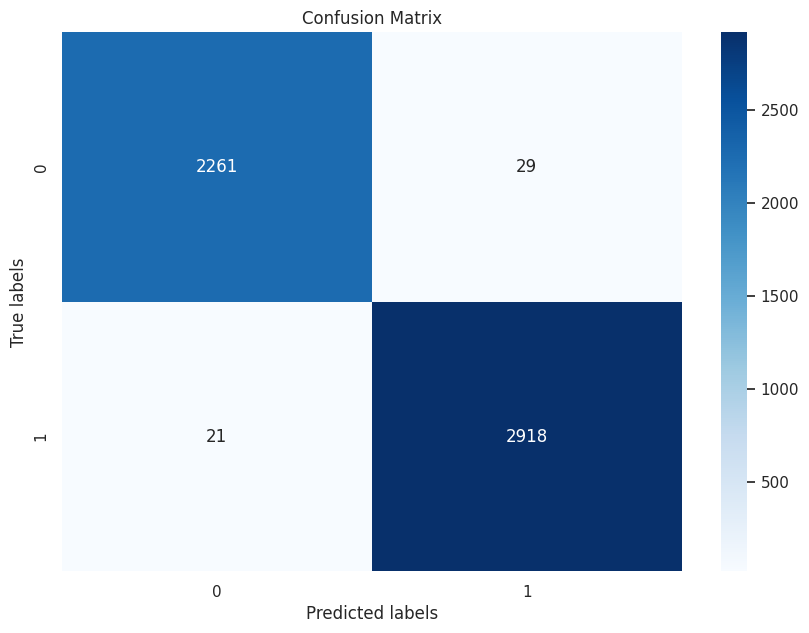

In [73]:
# y `y_pred` las etiquetas predichas por el modelo.
y_true = y_val  # Etiquetas verdaderas
y_pred = y_val_pred  # Etiquetas predichas por el modelo

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred)

# Crear el gráfico de la matriz de confusión con seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()





Tenemos un clasificador con muy buen rendimiento sobre el conjunto de validación pero necesitamos usar ahora las predicciones de este clasificador para estimar la "Demora". Usaremos la siguiente heurística:
1. Si la predicción del clasificador es 1 entonces la demora estimadas es de 31 días, que es la demora media para las transacciones pagadas y es el percentil 72 del dataset para ese tipo de transacciones.

2. Si la predicción es 0 entonces la demora estimada será de de 1261 días. Que es la demora media para las cuentas no pagadas.

In [74]:
def heuristic_prediction(xs, rf_clf_model, delay_paid_bill=31, delay_non_paid_bill=1261):
  clf_preds = rf_clf_model.predict(xs)
  hr_preds = np.where(clf_preds == 1, delay_paid_bill, delay_non_paid_bill)
  return hr_preds

hr_preds = heuristic_prediction(valid_xs2, rf_clf_model)

hr_mae = mean_absolute_error(hr_preds, valid_y)
hr_r2 = r2_score(hr_preds, valid_y)

print(f"HR MAE:{hr_mae}", f"HR R^2:{hr_r2}")


HR MAE:258.98470070759225 HR R^2:0.4493481368014022


## Evluando sobre el conjunto de pruebas

In [75]:
# Crear el dataset de prueba como objeto de TabularPandas
to_test = TabularPandas(fastai_df_test, procs, cat, cont, y_names='Demora', splits=None)
to_test_2 = TabularPandas(fastai_df_test_2, procs, cat, cont, y_names='Pagada?', splits=None)
x_test = to_test.xs
y_test = to_test.y
x_test_2 = to_test_2.xs
y_test_2 = to_test_2.y
dls2 = to_test.dataloaders(1024)
learn.dls.valid = dls2

### Evaluación del clasificador

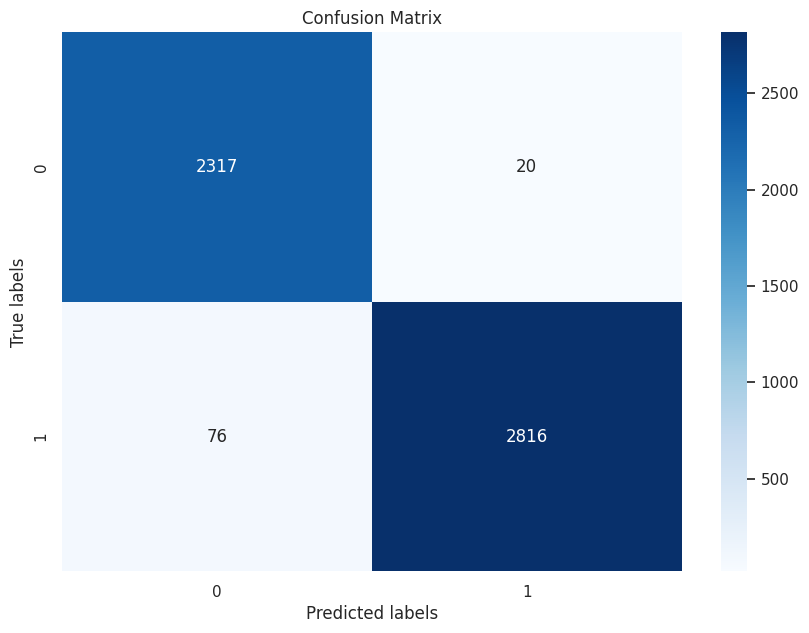

In [76]:
y_val_pred = rf_clf_model.predict(x_test_2)
y_true = y_test_2  # Etiquetas verdaderas
y_pred = y_val_pred  # Etiquetas predichas por el modelo

# Calcular la matriz de confusión
conf_mat = confusion_matrix(y_true, y_pred)

# Crear el gráfico de la matriz de confusión con seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

El calisificador mantiene un buen rendimiento en el conjunto de pruebas

### Evaluación de los modelos de regresión

In [77]:
rf_test_pred = rf_fastai_model.predict(x_test)
learn_test_pred, _ = learn.get_preds()
ens_test_pred = (to_np(learn_test_pred.squeeze()) + rf_test_pred) /2
hr_test_pred = heuristic_prediction(x_test, rf_clf_model)

rf_mae_test = mean_absolute_error(rf_test_pred, y_test)
learn_mae_test = mean_absolute_error(learn_test_pred, y_test)
ens_mae_test = mean_absolute_error(ens_test_pred, y_test)
hr_mae_test = mean_absolute_error(hr_test_pred, y_test)


print(f"MAE RF: {rf_mae_test}, MAE NN: {learn_mae_test}, MAE Ensemble: {ens_mae_test}, MAE HR: {hr_mae_test}")
print(f"R^2 RF: {r2_score(rf_test_pred, y_test)}, R^2 NN: {r2_score(learn_test_pred, y_test)}",
      f"R^2 Ensemble: {r2_score(ens_test_pred, y_test)}", f"R^2 HR: {r2_score(hr_test_pred, y_test)}")



MAE RF: 90.25118600794686, MAE NN: 167.8267364501953, MAE Ensemble: 126.68408994000201, MAE HR: 284.63300822336964
R^2 RF: 0.8538436784981257, R^2 NN: 0.2247252339652498 R^2 Ensemble: 0.594613286292591 R^2 HR: 0.37047204440909454


In [78]:
to_np(learn_test_pred.squeeze())

array([ 41.209503, 919.11444 ,  47.863495, ...,  39.846474,  45.67229 ,
       887.07983 ], dtype=float32)

In [79]:
y_test

17501      88.0
27699    1053.0
7013        8.0
5215        0.0
3395       39.0
          ...  
12955      64.0
21514    1092.0
11559     141.0
2487      118.0
30156     827.0
Name: Demora, Length: 5229, dtype: float32

In [80]:
results_df = pd.DataFrame({
    "RF": rf_test_pred,
    "NN": to_np(learn_test_pred.squeeze()),
    "Ensemble": ens_test_pred,
    "HR": hr_test_pred
}).reset_index(drop=True)
results_df["Real"] = y_test.reset_index(drop=True)
results_df["Paid?"]= y_test_2.reset_index(drop=True)
results_df

,RF,NN,Ensemble,HR,Real,Paid?
0,88.958938,41.209503,65.084221,1261,88.0,0
1,967.947740,919.114441,943.531090,1261,1053.0,0
2,30.508236,47.863495,39.185865,31,8.0,1
3,26.042336,10.344285,18.193310,31,0.0,1
4,37.283821,43.825405,40.554613,31,39.0,1
...,...,...,...,...,...,...
5224,71.141521,52.202045,61.671783,31,64.0,1
5225,920.824236,314.839874,617.832055,1261,1092.0,0
5226,98.956737,39.846474,69.401605,31,141.0,1
5227,32.157249,45.672291,38.914770,31,118.0,1


In [81]:
rf_mae_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==1]["RF"], results_df[results_df["Paid?"]==1]["Real"])
rf_mae_non_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==0]["RF"], results_df[results_df["Paid?"]==0]["Real"])
nn_mae_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==1]["NN"], results_df[results_df["Paid?"]==1]["Real"])
nn_mae_non_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==0]["NN"], results_df[results_df["Paid?"]==0]["Real"])
ensembled_mae_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==1]["Ensemble"], results_df[results_df["Paid?"]==1]["Real"])
ensembled_mae_non_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==0]["Ensemble"], results_df[results_df["Paid?"]==0]["Real"])
hr_mae_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==1]["HR"], results_df[results_df["Paid?"]==1]["Real"])
hr_mae_non_paid_bill = mean_absolute_error(results_df[results_df["Paid?"]==0]["HR"], results_df[results_df["Paid?"]==0]["Real"])

print(f"RF MAE Paid Bill: {rf_mae_paid_bill}, RF MAE Non Paid Bill: {rf_mae_non_paid_bill}\n")
print(f"NN MAE Paid Bill: {nn_mae_paid_bill}, NN MAE Non Paid Bill: {nn_mae_non_paid_bill}\n")
print(f"Ensemble MAE Paid Bill: {ensembled_mae_paid_bill}, Ensemble MAE Non Paid Bill: {ensembled_mae_non_paid_bill}\n")
print(f"HR MAE Paid Bill: {hr_mae_paid_bill}, HR MAE Non Paid Bill: {hr_mae_non_paid_bill}\n")


RF MAE Paid Bill: 59.5193262900693, RF MAE Non Paid Bill: 128.28136927885052

NN MAE Paid Bill: 99.18594360351562, NN MAE Non Paid Bill: 252.76861572265625

Ensemble MAE Paid Bill: 78.28174816231429, Ensemble MAE Non Paid Bill: 186.5812112156002

HR MAE Paid Bill: 56.428423236514526, HR MAE Non Paid Bill: 567.0325203252032



In [82]:
results_df.to_excel("results.xlsx")

## Conclusiones

Ninguno de los modelos implementados mostró un rendimiento sobresaliente, siendo el el random forest de regresión el mejor modelo. Esto es a causa de la abundancia de valores extremos en la variable "Dermora" . Aunque quedan muchos enfoques por probar sería útil consultar con la empresa sobre la fidelidad de los datos respecto a la realidad empresarial. El dataset cuenta con valores de retraso de cuentas de más de 2400 días cuando el máximo número de días para pagar registrado es de 45 días. Es necesario confirmar si tales valores corresponden a errores de registro de datos o efectivamente la empresa opera con bajo esos parámetros. Debido a esta situación, se recomienda usar el modelo heurístico, aún cuando no es el que mejores resultados ofrece. Esto debido a que la media de la demora en cuentas pagadas relativamente baja(31 días), prediciendo si una cuenta será pagada o no, se puede realizar una predición de una demora máxima relativamente certera para valores por debajo contenidos en el percentil 90 de las cuentas pagadas. Si una cuenta es predicha como no pagada, la incertidumbre en la predicción de la demora crece pero aún así se tiene informacíon útil ya que el 75% de los valores de las cuentas no pagadas tienen una demora registrada superior a 580 días. Se puede usar esta información para operar en la empresa.

In [84]:
# Función para guardar el modelo
from joblib import dump, load
dump(rf_clf_model, 'rf_clf.joblib')


# Ejemplo de uso
# Supongamos que xs y y son tus datos de entrenamiento

rf_clf_model = load('rf_clf.joblib')
